In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
data=pd.read_csv('C:/Users/pc/OneDrive/바탕 화면/DataFrame_Second.csv')

In [20]:
data.head()

,경도,위도,year,month,day,hour,min,주소_강남구,주소_강동구,주소_강북구,...,주소_종로구,주소_중구,주소_중랑구,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,126.859911,37.555537,2021,9,29,0.0,5.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,127.018013,37.567483,2021,9,29,0.0,38.0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,127.012793,37.569183,2021,9,29,0.0,38.0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,126.847125,37.547040,2021,9,29,0.0,50.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,127.015703,37.569085,2021,9,29,1.0,15.0,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [21]:
target=data[['경도','위도']]
pos=data[['경도','위도']]
target.shape

(2423760, 2)

In [22]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()

train_minmax=minmax_scaler.fit_transform(pos)
train_minmax=pd.DataFrame(train_minmax, index=pos.index, columns=pos.columns)

In [23]:
data['경도']=train_minmax['경도']
data['위도']=train_minmax['위도']

In [24]:
data['year']=(data['year']-2021)/(2024-2021)
data['month']=(data['month']-1)/(12-1)
data['day']=(data['day']-1)/(31-1)
data['hour']=data['hour']/24
data['min']=data['min']/60

In [25]:
data.head()

,경도,위도,year,month,day,hour,min,주소_강남구,주소_강동구,주소_강북구,...,주소_종로구,주소_중구,주소_중랑구,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,0.145691,0.508049,0.0,0.727273,0.933333,0.000000,0.083333,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.544290,0.550235,0.0,0.727273,0.933333,0.000000,0.633333,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,0.531130,0.556240,0.0,0.727273,0.933333,0.000000,0.633333,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,0.113454,0.478043,0.0,0.727273,0.933333,0.000000,0.833333,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.538467,0.555893,0.0,0.727273,0.933333,0.041667,0.250000,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [26]:
train_data=data[(data['year']!=1)]
test_data=data[(data['year']==1)]
print(train_data.shape,test_data.shape)

(2213390, 39) (210370, 39)


In [80]:
def create_hyperdataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i+time_step), :]
        X.append(a)
        y.append(data[i+time_step, :2])
    return np.array(X, dtype=float), np.array(y, dtype=float)

timestep=7

X_train, y_train = create_hyperdataset(train_data.values,timestep)
X_test, y_test = create_hyperdataset(test_data.values,timestep)

In [92]:
import keras
import tensorflow
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# 학습률 동적 조정 콜백 함수
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
# 조기 종료 콜백 함수
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
opt=keras.optimizers.Adam(learning_rate=0.001)
model=Sequential()
model.add(LSTM(100, input_shape=(7,X_train.shape[2]), return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.compile(optimizer=opt, loss='mean_squared_error')
history=model.fit(X_train,y_train, epochs=30, batch_size=128, validation_data=(X_test,y_test), callbacks=[early_stopping, lr_reducer])
model.summary()

Epoch 1/30
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 274s 16ms/step - loss: 0.0308 - val_loss: 0.0293 - learning_rate: 0.0010
Epoch 2/30
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 259s 15ms/step - loss: 0.0299 - val_loss: 0.0293 - learning_rate: 0.0010
Epoch 3/30
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 259s 15ms/step - loss: 0.0298 - val_loss: 0.0293 - learning_rate: 0.0010
Epoch 4/30
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 259s 15ms/step - loss: 0.0298 - val_loss: 0.0292 - learning_rate: 0.0010
Epoch 5/30
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 259s 15ms/step - loss: 0.0297 - val_loss: 0.0293 - learning_rate: 5.0000e-04
Epoch 6/30
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 259s 15ms/step - loss: 0.0297 - val_loss: 0.0292 - learning_rate: 5.0000e-04
Epoch 7/30
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 260s 15ms/step - loss: 0.0296 - val_loss: 0.0292 - learning_rate: 5.0000e-04
Epoch 8/30
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 261s 15ms/step - loss: 0.0296 - val_loss: 0.0292 - learning_rate: 2.5000e-04
Epoch 9/30
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 260s

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                       │ (None, 7, 100)              │          56,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_36 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 435,032 (1.66 MB)

 Trainable params: 145,010 (566.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 290,022 (1.11 MB)

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

6574/6574 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
Mean Squared Error (MSE): 0.02929935437580175
Root Mean Squared Error (RMSE): 0.17117054178742833
Mean Absolute Error (MAE): 0.13704202838347262
R² Score: 0.033686244379403096


In [94]:
score = model.evaluate(X_test, y_test, batch_size=32)
score

6574/6574 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0297


0.029299363493919373

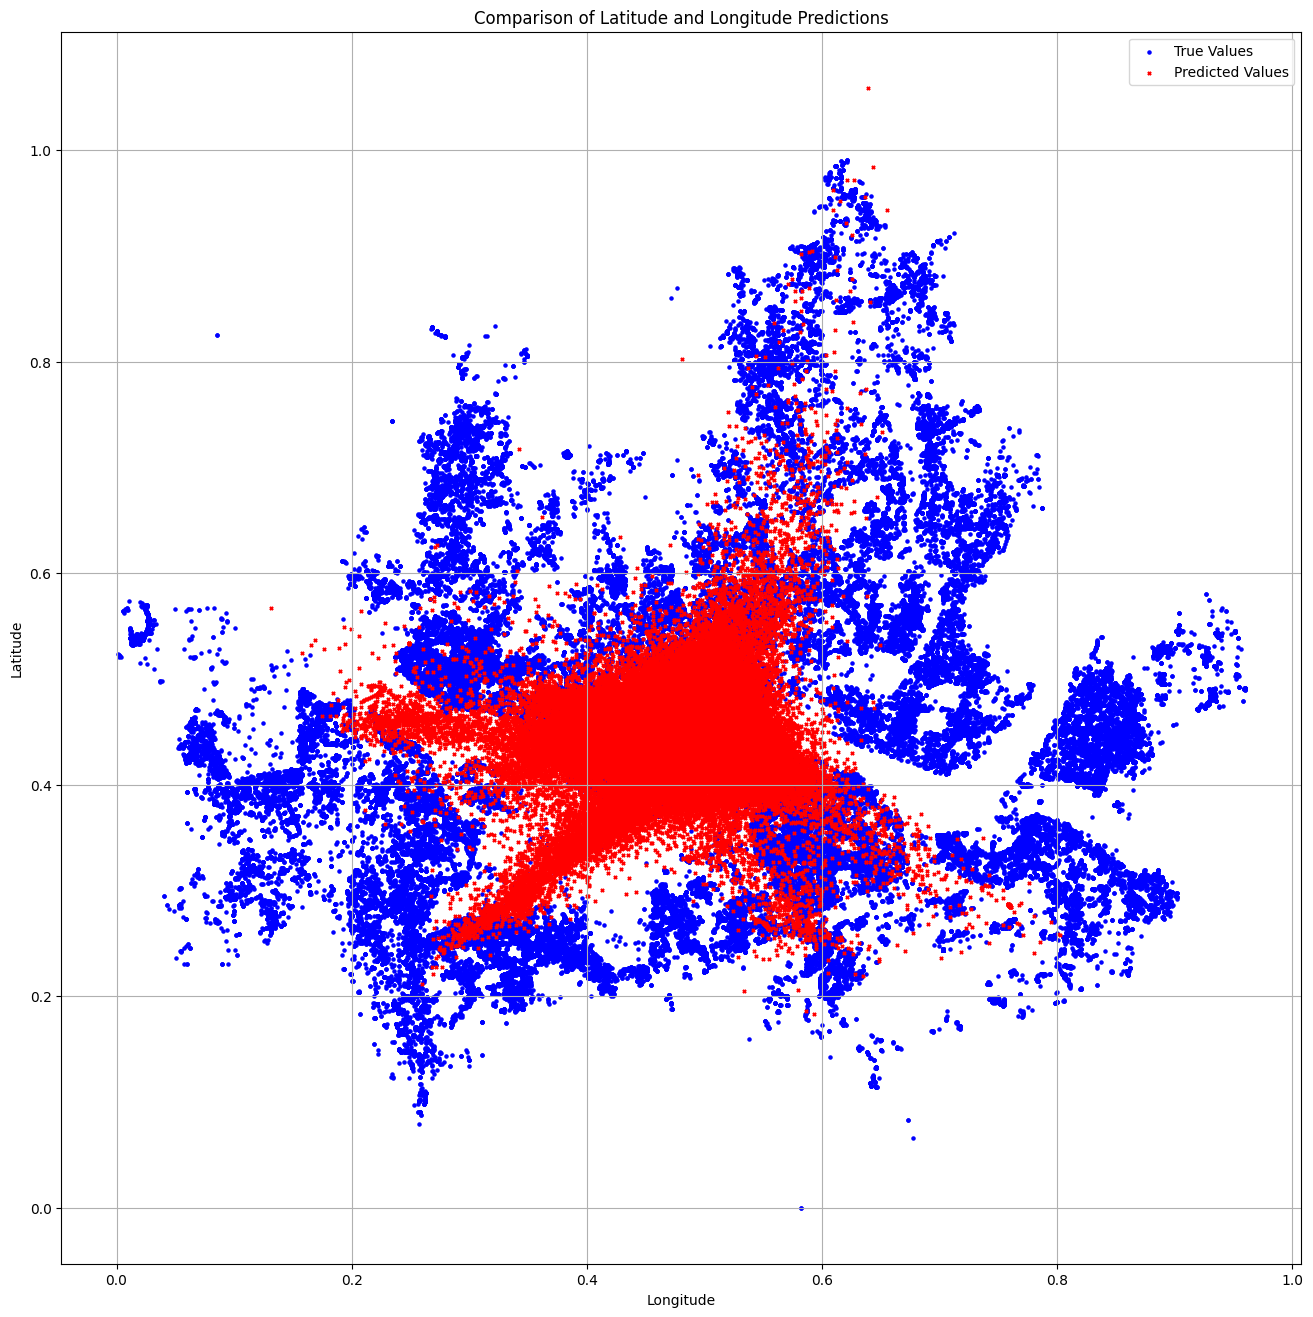

In [95]:
y_test_lat, y_test_lon = y_test[:, 0], y_test[:, 1]
y_pred_lat, y_pred_lon = y_pred[:, 0], y_pred[:, 1]

plt.figure(figsize=(16, 16))

# 실제값: 파란색 원
plt.scatter(y_test_lat, y_test_lon, label='True Values', color='blue', marker='o', s=5)
# 예측값: 빨간색 X
plt.scatter(y_pred_lat, y_pred_lon, label='Predicted Values', color='red', marker='x', s=5)

# 그래프 꾸미기
plt.title('Comparison of Latitude and Longitude Predictions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

plt.show()

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# GRU 모델 정의
model = Sequential()
model.add(GRU(100, input_shape=(7, X_train.shape[2]), return_sequences=True))  # GRU 레이어
model.add(GRU(100, return_sequences=False))  # GRU 레이어
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))  # 출력층

model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train,y_train, epochs=20, batch_size=128, validation_data=(X_test,y_test), callbacks=[early_stopping, lr_reducer])
# 모델 요약 출력
model.summary()

C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 272s 16ms/step - loss: 0.0305 - val_loss: 0.0292 - learning_rate: 0.0010
Epoch 2/20
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 252s 15ms/step - loss: 0.0299 - val_loss: 0.0292 - learning_rate: 0.0010
Epoch 3/20
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 250s 14ms/step - loss: 0.0298 - val_loss: 0.0292 - learning_rate: 0.0010
Epoch 4/20
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 251s 15ms/step - loss: 0.0298 - val_loss: 0.0292 - learning_rate: 0.0010
Epoch 5/20
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 246s 14ms/step - loss: 0.0297 - val_loss: 0.0293 - learning_rate: 5.0000e-04
Epoch 6/20
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 250s 14ms/step - loss: 0.0297 - val_loss: 0.0292 - learning_rate: 5.0000e-04
Epoch 7/20
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 251s 15ms/step - loss: 0.0296 - val_loss: 0.0293 - learning_rate: 5.0000e-04
Epoch 8/20
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 251s 15ms/step - loss: 0.0296 - val_loss: 0.0292 - learning_rate: 2.5000e-04
Epoch 9/20
17293/17293 ━━━━━━━━━━━━━━━━━━━━ 251s

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                          │ (None, 7, 100)              │          42,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 334,532 (1.28 MB)

 Trainable params: 111,510 (435.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 223,022 (871.18 KB)

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

6574/6574 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step
Mean Squared Error (MSE): 0.029313681884679
Root Mean Squared Error (RMSE): 0.17121238823367602
Mean Absolute Error (MAE): 0.13700993151475502
R² Score: 0.03308682997865642


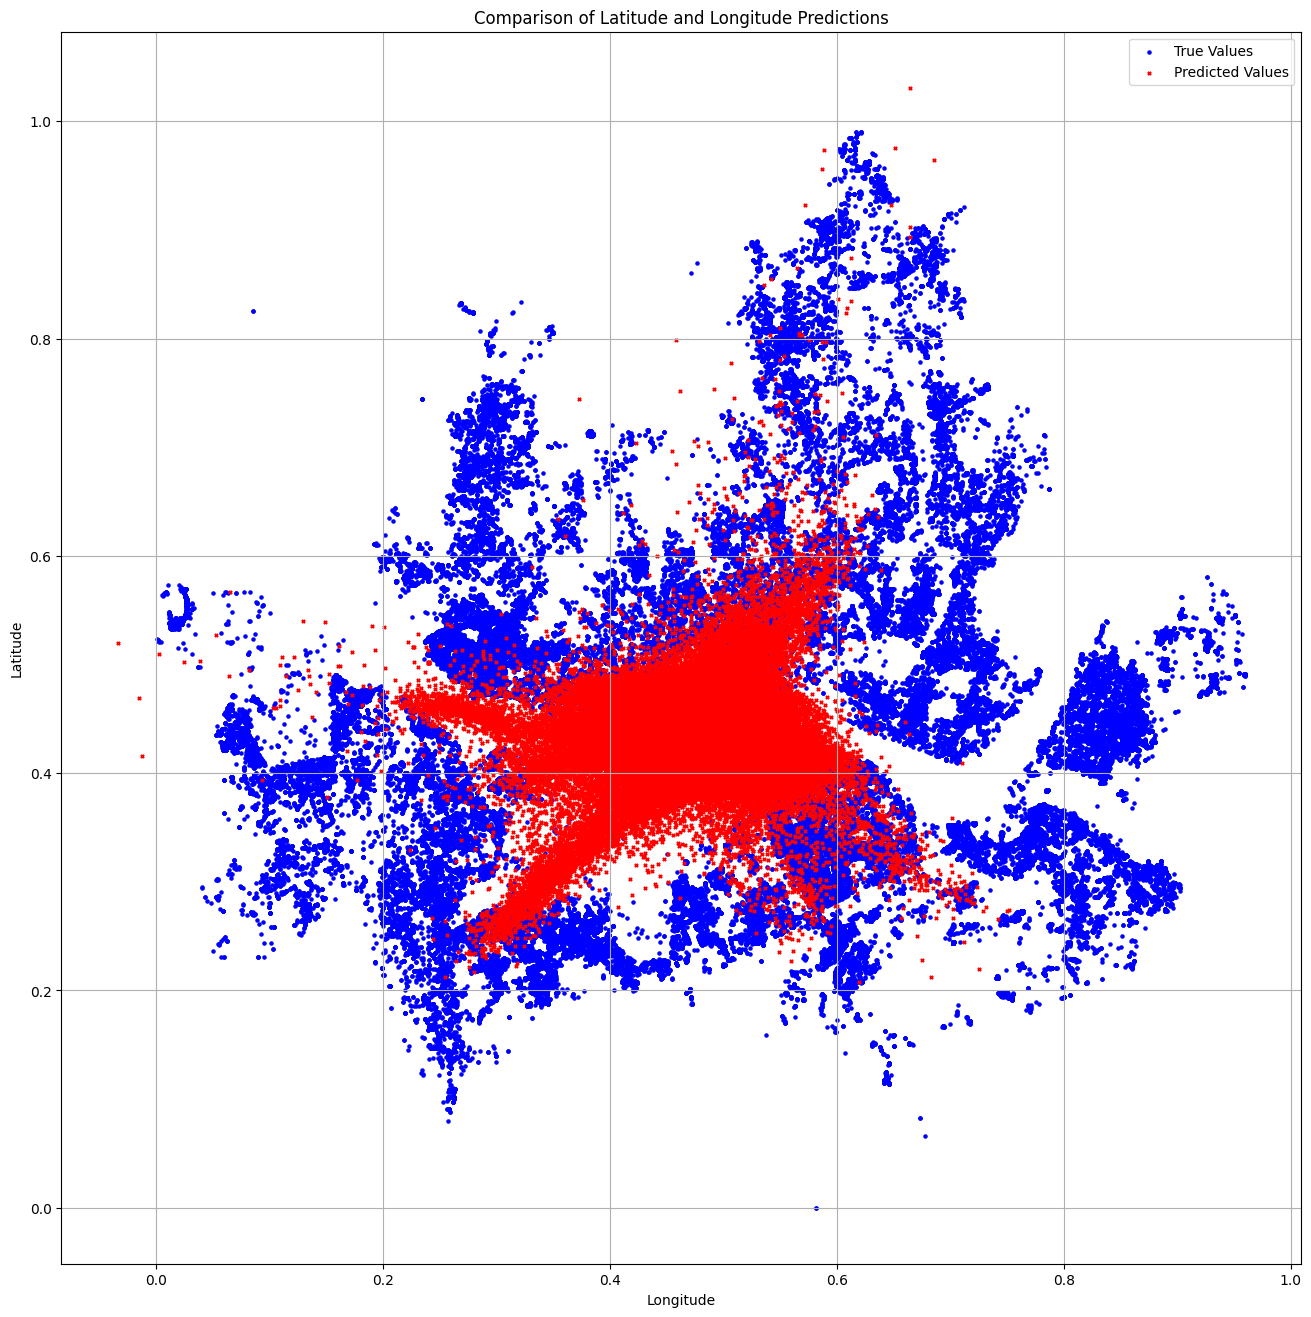

In [98]:
y_test_lat, y_test_lon = y_test[:, 0], y_test[:, 1]
y_pred_lat, y_pred_lon = y_pred[:, 0], y_pred[:, 1]

plt.figure(figsize=(16, 16))

# 실제값: 파란색 원
plt.scatter(y_test_lat, y_test_lon, label='True Values', color='blue', marker='o', s=5)
# 예측값: 빨간색 X
plt.scatter(y_pred_lat, y_pred_lon, label='Predicted Values', color='red', marker='x', s=5)

# 그래프 꾸미기
plt.title('Comparison of Latitude and Longitude Predictions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

plt.show()